In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

# 로지스틱 회귀 분석

로지스틱 회귀분석에서 binary case에서는 종속변수가 이항분포를 따르고, 그 모수 $\theta$ 가 독립 변수 $x$에 의존한다고 가정한다.

## Sigmoid 함수

모수 $\theta$는 x의 함수 $\theta(x)$이다. x에 대한 선형 함수로 0부터 1사이의 값이 나오도록 sigmoid함수로 구성되어있다.
$$
\theta = f(w^Tx)
$$

- 시그모이드 함수는 유한한 구간 사이의 한정된(bounded)값과
- 항상 0 또는 양의 기울기를 가지는 함수이다.
<br>


1. 로지스틱함수 (Logistic function)
$$
\text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}}
$$

2. Hyperbolic tangent
$$
\tanh(z) = \frac{\sinh z}{\cosh z} = \frac {e^z - e^{-z}} {e^z + e^{-z}} = 2 \sigma(2x) - 1
$$

3. Error function
$$
\text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt
$$



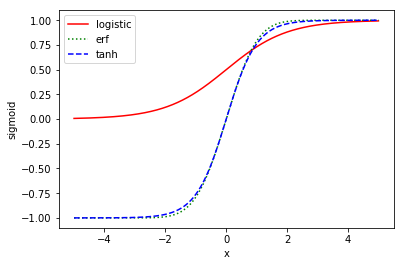

In [3]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

## 로지스틱 함수

여러가지 시그모이드 중 로지스틱 함수는 다음과 같은 물리적인 의미를 가지고 있다.

__$-\infty$에서 $\infty$사이의 값을 가지는 변수를 0 부터 1사이의 값으로 변환시킬 수 있다.__

$$
\text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}}
$$

- odds ratio 
베르누이 시행에서 1이 나올 $\theta$ 와 0이 나올 1-$\theta$의 비를 odds ratio 라고합니다.
$$
\text{odds ratio} = \dfrac{\theta}{1-\theta}
$$

- logit function
odds ration에 로그를 취한것이, logit 함수입니다. 비율은 0부터 1사이의 값인데, 이 확률값이 로그에 들어가면서 범위가 $-\infty$에서 $\infty$가 됩니다. 이를 역수치 시킨다면? 바로 로지스틱 함수가 나옵니다.
$$
z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\theta}{1-\theta}\right)
$$

In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Logistic regression Cost function

